## Analysing the Impact of Russian Tweets on the 2016 US Presidential Elections
In **2017** and **2018**, the social media giants **Twitter**, **Facebook**, and also **Google** were heavily criticized for allowing international agents, especially **Russia** to spread false or misleading content meant to influence public opinion in the US leading up the the 2016 elections. This public scrutiny ultimately led to the publication of two major data bundles: one of **Russian tweets** and another of **Iranian tweets**. These tweets — according to Twitter, Congress, and various media reports — alledgely ***were used to manipulate the US voter*** into voting for Donald Trump.

In this exercise we shall analyse the [Russian troll tweets](https://github.com/fivethirtyeight/russian-troll-tweets) dataset and conclude whether there was any grounds to point fingers at the Russians. We will try to find out how tweeting actitivities might have corresponded to certain events leading up to the elections, during and after the elections.

***This dataset is a subset of the nearly 3 million tweets sent from Twitter handles connected to the Internet Research Agency, a Russian "troll factory" and a defendant in an indictment that was filed by the Justice Department in February 2018, as part of special counsel Robert Mueller's Russia investigation***.

### Load required modules

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

### Load data and have a look...

In [3]:
file_path = '../data/russian-troll-tweets/IRAhandle_tweets_1.csv'
russian_tweets_1 = pd.read_csv(file_path)

In [4]:
russian_tweets_1.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,...,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,...,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,...,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,...,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,...,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


In [5]:
print(f'Size or dimension of data: {russian_tweets_1.shape}')

Size or dimension of data: (243891, 21)


In [6]:
print(f'Columns names: \n{list(russian_tweets_1)}')

Columns names: 
['external_author_id', 'author', 'content', 'region', 'language', 'publish_date', 'harvested_date', 'following', 'followers', 'updates', 'post_type', 'account_type', 'retweet', 'account_category', 'new_june_2018', 'alt_external_id', 'tweet_id', 'article_url', 'tco1_step1', 'tco2_step1', 'tco3_step1']


This subset of data consists of **243,891** tweets or rows and **21** columns. This is a reasonable size to work with. Let's have a look at an example of a sample tweet... 

In [8]:
russian_tweets_1.iloc[1]

external_author_id                                   906000000000000000
author                                                           10_GOP
content               Marshawn Lynch arrives to game in anti-Trump s...
region                                                          Unknown
language                                                        English
publish_date                                            10/1/2017 22:43
harvested_date                                          10/1/2017 22:43
following                                                          1054
followers                                                          9637
updates                                                             254
post_type                                                           NaN
account_type                                                      Right
retweet                                                               0
account_category                                             Rig

We can see that some of the columns have missing data or NaNs...
### Check for missing values or NaNs

In [9]:
russian_tweets_1.isnull().sum().sort_values(ascending = False)

tco3_step1            241088
tco2_step1            177459
post_type              89299
tco1_step1             63371
region                    38
article_url                0
following                  0
author                     0
content                    0
language                   0
publish_date               0
harvested_date             0
followers                  0
tweet_id                   0
updates                    0
account_type               0
retweet                    0
account_category           0
new_june_2018              0
alt_external_id            0
external_author_id         0
dtype: int64

The most important columns of interest are **content**, **publish_date**, **tweet_id** among others and these contain no missing values! Let's check the data type of each column...
### Check data type

In [10]:
print(russian_tweets_1.dtypes)

external_author_id     int64
author                object
content               object
region                object
language              object
publish_date          object
harvested_date        object
following              int64
followers              int64
updates                int64
post_type             object
account_type          object
retweet                int64
account_category      object
new_june_2018          int64
alt_external_id        int64
tweet_id               int64
article_url           object
tco1_step1            object
tco2_step1            object
tco3_step1            object
dtype: object


***tweet_id, external_author_id, alt_external_id*** have been read as **int64** or integer data type. since we shall not be performing any mathematical calculations on these columns we can convert them to object data type. Similarly, ***publish_date and harvested_date*** have been read as **object** data types. We shall have to convert them to **date** data type in order to perform **temporal or time series** analysis on them...

In [11]:
columns = ['publish_date', 'harvested_date']
for column in columns:
    russian_tweets_1[column] = pd.to_datetime(russian_tweets_1[column])

In [12]:
columns = ['tweet_id', 'external_author_id', 'alt_external_id']
for column in columns:
    russian_tweets_1[column] = russian_tweets_1[column].astype('object')

In [13]:
print(russian_tweets_1.dtypes)

external_author_id            object
author                        object
content                       object
region                        object
language                      object
publish_date          datetime64[ns]
harvested_date        datetime64[ns]
following                      int64
followers                      int64
updates                        int64
post_type                     object
account_type                  object
retweet                        int64
account_category              object
new_june_2018                  int64
alt_external_id               object
tweet_id                      object
article_url                   object
tco1_step1                    object
tco2_step1                    object
tco3_step1                    object
dtype: object


### Let check the duration of tweets captured by this dataset...

In [14]:
start_date = russian_tweets_1['publish_date'].min()
end_date = russian_tweets_1['publish_date'].max()
print(f'The tweets in this dataset cover a period from {start_date} to {end_date}')

The tweets in this dataset cover a period from 2014-11-27 09:59:00 to 2018-03-22 01:57:00


This dataset covers more than 3 years of tweets from **27th Nov. 2014** to **22nd March 2018**. The **publish_date** column also include the time the tweets were published. To ease our time series analysis of the tweets we shall create a new column to hold only the **date** component. Let's call this column **tweet_date**.

In [15]:
russian_tweets_1['tweet_date'] = pd.to_datetime(russian_tweets_1['publish_date'].dt.date)

### Resampling the Data
**Resampling** is the process of aggregating data over specific time intervals. In our analysis, we’ll resample the data to obtain a **monthly tally**. The first step in *resampling* our data is to set **tweet_time** as an index using **`set_index()`** function. This will allow us to select and locate entries based on their **tweet_time**. 

In [16]:
russ_tweets_over_time = russian_tweets_1.set_index('tweet_date')
russ_tweets_over_time.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
tweet_date,,,,,,,,,,,,,,,,,,,,,
2017-10-01,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01 19:58:00,2017-10-01 19:59:00,1052,9636,253,...,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
2017-10-01,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01 22:43:00,2017-10-01 22:43:00,1054,9637,254,...,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2017-10-01,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,2017-10-01 22:50:00,2017-10-01 22:51:00,1054,9637,255,...,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
2017-10-01,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01 23:52:00,2017-10-01 23:52:00,1062,9642,256,...,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
2017-10-01,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,2017-10-01 02:13:00,2017-10-01 02:13:00,1050,9645,246,...,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


With our new index, we can ***group and aggregate*** our data over time using the **`resample()`** function. We can specify the frequency at which we want to ***aggregate or resample*** our data over time — **every day, every week, or every month** — by providing the corresponding parameter to the **`resample()`** function. In this case, because we’re interested in how these tweets may have been used to influence the **2016 US presidential election**, we want a **monthly tally**, so we pass in the string **"M"** (short for month). Since we want a **monthly count** of tweets, we’ll use the **`count()`** function to aggregate the tally. 

In [17]:
russ_tweet_tally = russ_tweets_over_time.resample('M').count()
russ_tweet_tally.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
tweet_date,,,,,,,,,,,,,,,,,,,,,
2014-11-30,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,3,0,0
2014-12-31,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,3,0,0
2015-01-31,653,653,653,653,653,653,653,653,653,653,...,653,653,653,653,653,653,653,111,2,0
2015-02-28,578,578,578,578,578,578,578,578,578,578,...,578,578,578,578,578,578,578,240,4,0
2015-03-31,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,...,1045,1045,1045,1045,1045,1045,1045,279,16,0


In [19]:
print(f'Size of tweet tally DataFrame: {russ_tweet_tally.shape}')

Size of tweet tally DataFrame: (41, 21)


Every row now represents number of actual values contained in every column for each month, beginning with the date in **tweet_time**.
As we can see he **counts** in each column for a given month do vary or are inconsistent. This is particularly the case with some of the not so important columns where the tweet counts are **0**. However, a better approach would be to look for the columns with a value for every single row (a column without any NaNs) and count those values.

We saw when we checked for NaNs values that the most important columns of interest - **content**, **publish_date**, **tweet_id** - contain no missing values! We can therefore use the **tweet_id** column (*or content or publish_date*) as the reference for calculating the ***total number of tweets per month***, which we’ll store in the variable **monthly_tweet_count**.

In [20]:
monthly_tweet_count = russ_tweet_tally['tweet_id']
monthly_tweet_count.head()

tweet_date
2014-11-30      72
2014-12-31      74
2015-01-31     653
2015-02-28     578
2015-03-31    1045
Freq: M, Name: tweet_id, dtype: int64

### Plotting the Data
**Time series** are often much clearer when visualized...Let's plot the **tweet_date** (our index) of our data frame on the x-axis and the **tweets_per_month** on the y-axis...

Text(0, 0.5, 'Tweet Count')

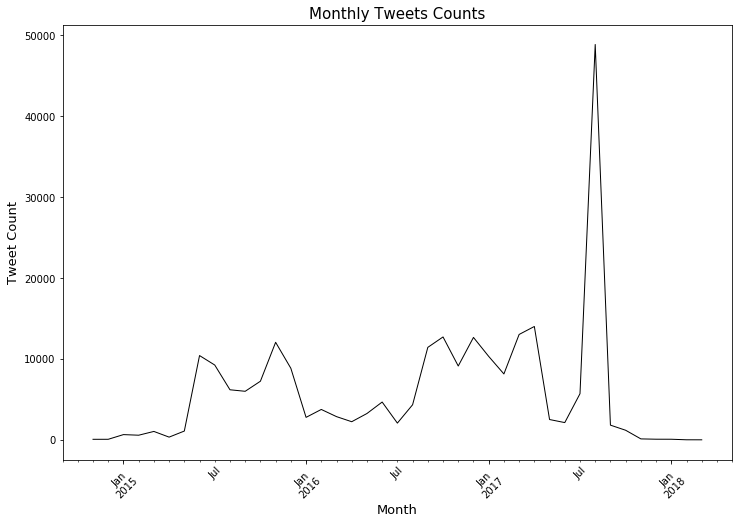

In [26]:
plt.style.use('seaborn-bright')
monthly_tweet_count.plot(linestyle = '-', figsize = (12, 8), rot = 45, color = 'k', linewidth = 1)
plt.title('Monthly Tweets Counts', fontsize = 15)
plt.xlabel('Month', fontsize = 13)
plt.ylabel('Tweet Count', fontsize = 13)

### What's happening here?
By the way did you see the pretty x-axis ticks from our datetime index?

This dataset is depicting a pattern which we need to further investigate. We see a rise in tweet actitivities in the **second half of 2015** followed by a relative calm period in the **first half of 2016**. We also see a steady rise of activities in the one year period from July 2016 through November 2016 (the election month) to around June 2017. We would also like to know what was going between June and September 2017 more than half a year after the presidential election!

Let's have a look at the [Pivotal moments in Trump's presidential campaign](https://www.reuters.com/article/us-usa-election-timeline-factbox/timeline-pivotal-moments-in-trumps-presidential-campaign-idUSKBN1341FJ)
* **June 16, 2015** - Trump descends an escalator in the marble-lined atrium of Trump Tower in Manhattan to announce his campaign...
* **Dec. 7, 2015** - Trump calls for a “total and complete shutdown of Muslims entering the United States until our country’s representative can figure out what is going on.”
*  **Feb. 1, 2016** - Despite being ahead in the polls, Trump comes in second in the Iowa caucuses, the first state nominating contest...
* **March 1, 2016** - Trump wins seven of the 11 states that vote on so-called Super Tuesday.
* **March 3, 2016** - Mitt Romney, the Republican presidential candidate in 2012, delivers a scathing speech calling Trump a “con man...” 
* **May 3, 2016** - Trump wins Indiana, becoming the party’s presumptive nominee...
* **May 26, 2016** - Trump wins a majority of delegates, securing his nomination and foreclosing the possibility of a contested convention.
* **July 15*, 2016** - Trump announces Indiana Governor Mike Pence as his running mate. 
* **July 21, 2016** - Trump accepts the Republican Party’s nomination on the final day of the party’s convention in Cleveland.
* **September/October 2016** - Trump clashes with Clinton before an audience of tens of millions in three presidential debates 
* **Oct. 7*, 2016** - A recording surfaces of Trump boasting in 2005 of how his celebrity allows him to grope women...
* **Nov. 8, 2016** - Trump wins the U.S. presidential election in one of the biggest upsets in decades.

Also checkout [Timeline of investigations into Donald Trump and Russia (July–December 2017)](https://en.wikipedia.org/wiki/Timeline_of_investigations_into_Donald_Trump_and_Russia_(July%E2%80%93December_2017))
* **July 7, 2017** - During a two-hour meeting with Trump at the 2017 G20 Hamburg summit, Putin denies interfering in the 2016 US election...
* **July 8, 2017** - Returning from Germany aboard Air Force One, Trump preemptively dictates a misleading statement on behalf of Trump Jr., claiming that the Veselnitskaya meeting on June 9, 2016 concerned child adoption.
* **July 9, 2017** - The New York Times first reports that Trump Jr., Kushner and Manafort met Veselnitskaya at Trump Tower on June 9, 2016...
* **July 11, 2017** - Trump Jr. tweets his emails about the Trump Tower meeting before The New York Times publishes them minutes later...
* **July 12, 2017**  - Articles of Impeachment against President Trump are formally filed in the House of Representatives
* **July 14, 2017** - Brad Parscale, the digital media director of Trump's campaign, issues a statement stating "I am unaware of any Russian involvement in the digital and data operation of the 2016 Trump presidential campaign" after accepting an invitation to testify before the House Intelligence Committee
* **July 18, 2017** - Mueller obtains a search warrant for Michael Cohen's Gmail account.
* **July 19, 2017** - Trump, in an unscheduled interview with The New York Times, blasts Sessions for recusing himself without telling Trump in advance of his nomination to be Attorney General. Trump then threatens Mueller's job if the investigation expands to his personal finances. He tells the Times that he "didn't know about the Trump Tower meeting"...
* **August 2, 2017** - Trump signs the Countering America's Adversaries Through Sanctions Act (CAATSA), legislation limiting his ability to ease sanctions against Russia. The Trump campaign turns over about 20,000 pages of documents to the Senate Intelligence Committee...
* **August 3, 2017** - Flynn reveals a brief advisory role with Cambridge Analytica, the data mining and analysis firm that worked with Trump’s campaign, and the sponsoring Mercer family in an amended public financial filing. Flynn also discloses income from the Trump transition team
* **August 8, 2017** - Mueller's team obtains a search warrant for Cohen's Apple iCloud account
* **September 13, 2017** - Facebook states that a 225,000-member anti-immigrant group that attempted to organize anti-Clinton rallies in Texas during the 2016 presidential campaign was "likely operated out of Russia"
* **September 15, 2017** - In response to a warrant, Facebook gives Mueller copies of advertisements and account information related to the Russian advertisement purchases beyond what it gave Congress in the previous week.
* **September 21, 2017** - Facebook hands information on more than 3,000 Russia-linked advertisements to the Senate and House Intelligence Committees
* **September 25, 2017** - The Washington Post reports that "Russian operatives used Facebook ads to exploit divisions over black political activism and Muslims."
* **September 26, 2017** - Politico reports that approximately 150,000 dollars worth of Russian-funded Facebook advertisements promoted candidates Trump, Sanders and Stein.

The timeline listed above gives us some clues to better interpret the pattern in the dateset as displayed in the graph above. Trolls from Russia’s **Internet Research Agency** (IRA) were not at work until **June 2015**. **DJT** launched his campaigns on June 16, 2015 and this correlates with the sudden rise in the number of tweets per month which lasted till December 2016. This was followed by a period of relative calm and then another sudden rise in activities from **August 2016 to May 2017**. Election day, **November 8, 2016** falls within the period.
Why were IRA agents became very active in the aftermath of the 2016 US presidential election, especially from **July 2017 to September 2017**, which shows a huge rise in the number of monthly tweets? The answer lies in the fact that this was the period of the investigations into possible ***Russian interference in the US 2016 elections***. These investigations involved many Russians as can be seen in [Timeline of investigations into Donald Trump and Russia (July–December 2017)](https://en.wikipedia.org/wiki/Timeline_of_investigations_into_Donald_Trump_and_Russia_(July%E2%80%93December_2017)). This, reasonably, explains the huge interest by the Russians as shown by the disproportionate rise in the rate of tweets during the investigations.

## DISCLAIMER
***This analysis is simply an academic exercise. It is not part of or related in anyway to any investigations. This exercise does not have any opinion as to whether these tweets had any impact on the elections or not or whether they influenced the voters in any way. This analysis should therefore not be used in any legal setting as a supporting evidence.***